In [1]:

# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data set loading

In [2]:
# prompt: load the dataset from csv file upload

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Load the dataset
df = pd.read_csv(fn)


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
User uploaded file "healthcare-dataset-stroke-data.csv" with length 316971 bytes


Dataset first view

In [3]:
# prompt: dataset first look with attributes

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# prompt: total number of attributes

# Total number of attributes
print("Total number of attributes:", df.shape[1])
df.head(3)

Total number of attributes: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [6]:
# prompt: show attributes as list

# Display the attributes as a list
print("Attributes:", df.columns.tolist())


Attributes: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


**Dataset Rows & Columns count**


In [7]:
# prompt: please check the Dataset Rows & Columns count

# Dataset Rows & Columns count
print("Dataset Rows & Columns count:", df.shape)


Dataset Rows & Columns count: (5110, 12)


Please check if any duplicate values[link text](https://)

In [8]:
# prompt: please check if any duplicate values

# Check for duplicate values
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


check if any null values

In [10]:
# prompt: check if any null or missing values

# Check for null values
print("Null values:\n", df.isnull().sum())


Null values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**What did i know about the dataset?**

The stroke dataset consists of 12 attributes related to human dataset. There are total 5110 rows and 12 columns.

No duplicate values exist.

There are 201 missing values in bmi attribute**

In [11]:
# prompt: Understanding The Variables

# Get information about the dataset
df.info()

# Describe the numerical features
df.describe()

# Check the unique values for categorical features
for col in df.select_dtypes(include=['object']).columns:
  print(f"\nUnique values in {col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Unique values in gender: ['Male' 'Female' 'Other']

Unique values in ever_married: ['Yes' 'No']

Unique values in work_type: ['Private' 'Self-employed' 'Gov

In [12]:
# prompt: please check unique values for each variable

# Check the unique values for each variable
for col in df.columns:
  print(f"\nUnique values in {col}: {df[col].unique()}")



Unique values in id: [ 9046 51676 31112 ... 19723 37544 44679]

Unique values in gender: ['Male' 'Female' 'Other']

Unique values in age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.2

** Understand the missing data - visualize and investigate"**

<Figure size 1000x600 with 0 Axes>

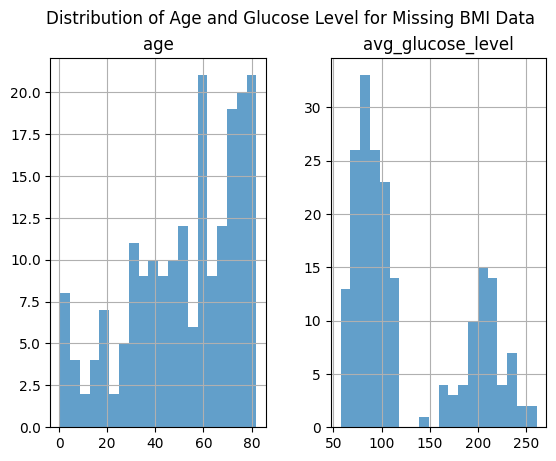

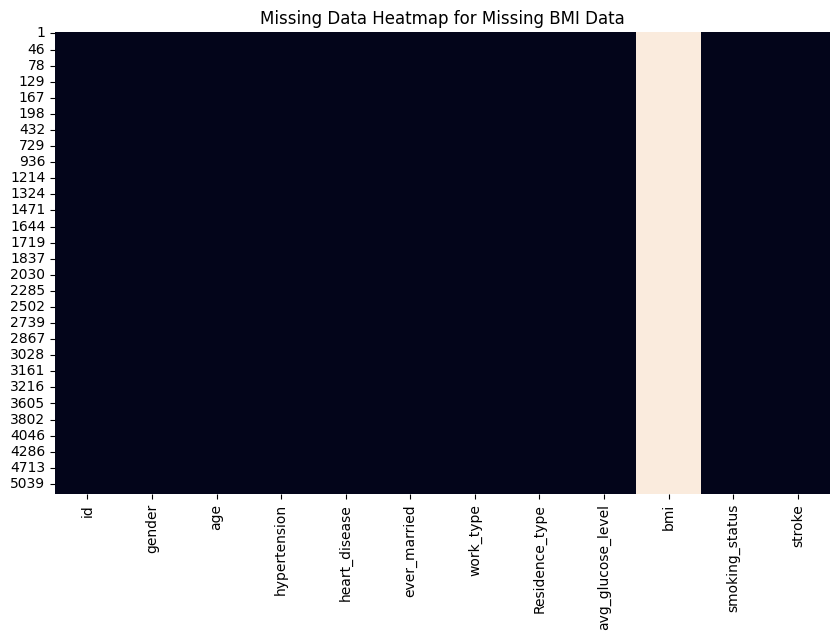

In [13]:
# prompt: Create a plot to see if the missing BMI data is correlated with other variables.

# Create a new DataFrame with only the rows where BMI is missing
missing_bmi_df = df[df['bmi'].isnull()]

# Plot the distribution of other variables for the missing BMI data
plt.figure(figsize=(10, 6))
missing_bmi_df.hist(column=['age', 'avg_glucose_level'], bins=20, alpha=0.7)
plt.suptitle('Distribution of Age and Glucose Level for Missing BMI Data')
plt.show()

# You can also use a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(missing_bmi_df.isnull(), cbar=False)
plt.title('Missing Data Heatmap for Missing BMI Data')
plt.show()


**please give me better correlaton between age and missinh BMI data**

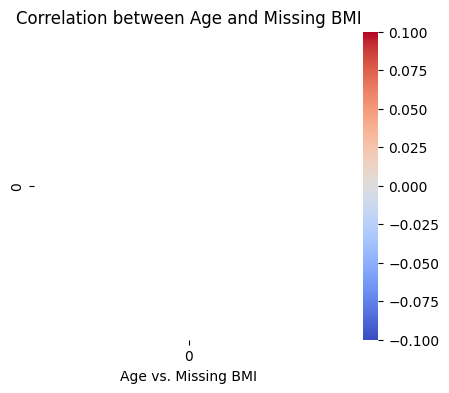

In [15]:
# prompt: please give me better heatmap to show the correlation between age and missing BMI data

# Create a new DataFrame with only the rows where BMI is missing
missing_bmi_df = df[df['bmi'].isnull()]

# Create a new column indicating whether BMI is missing
missing_bmi_df['bmi_missing'] = missing_bmi_df['bmi'].isnull()

# Calculate the correlation between age and missing BMI
correlation = missing_bmi_df['age'].corr(missing_bmi_df['bmi_missing'])

# Create a heatmap to visualize the correlation
plt.figure(figsize=(5, 4))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Age and Missing BMI')
plt.xlabel('Age vs. Missing BMI')
plt.show()


**

**Data Splitting**


In [16]:
# prompt: Splitting the data to train and test

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# prompt: # Checking the train distribution of dependent variable

print(y_train.value_counts(normalize=True))


stroke
0    0.954256
1    0.045744
Name: proportion, dtype: float64


In [18]:
# prompt: can we apply imputation methods to training and testing data

# Imputation for numerical features
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well

# Fit the imputer on the training data and transform both training and testing data
X_train[['bmi']] = imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = imputer.transform(X_test[['bmi']])



In [19]:
# prompt: please use KNN imputation to training and testing datasets

from sklearn.impute import KNNImputer

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the imputer on the training data and transform both training and testing data
X_train[['bmi']] = knn_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = knn_imputer.transform(X_test[['bmi']])


In [22]:
# prompt: are there any missing values in test data?

# Check for null values in the test data
print("Null values in X_test:\n", X_test.isnull().sum())


Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [23]:
# prompt: are there any missing values in training data?

# Check for null values in the training data
print("Null values in X_train:\n", X_train.isnull().sum())


Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [24]:
print('Missing values: ',sum(df.isnull().sum()))


Missing values:  201


In [26]:
# prompt: can you decide the best method to remove the null values please

# Since the 'bmi' column has missing values, we can use KNNImputer to fill them.
# KNNImputer is a more sophisticated method that considers the relationships between features.

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the imputer on the training data and transform both training and testing data
X_train[['bmi']] = knn_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = knn_imputer.transform(X_test[['bmi']])


In [27]:
# prompt: are there any remaining missing values?

# Check for null values in the test data
print("Null values in X_test:\n", X_test.isnull().sum())


# Check for null values in the training data
print("Null values in X_train:\n", X_train.isnull().sum())

print('Missing values: ',sum(df.isnull().sum()))


Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Missing values:  201


In [28]:
# prompt: why is it still showing me 201 missing values ?

# Check for null values in the training data after imputation
print("Null values in X_train:\n", X_train.isnull().sum())

# Check for null values in the test data after imputation
print("Null values in X_test:\n", X_test.isnull().sum())

# Print the total number of missing values in the entire dataset after imputation
print('Missing values: ',sum(df.isnull().sum()))


Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Missing values:  201


In [34]:
# prompt: please use KNN to fill the gaps

# Since the 'bmi' column has missing values, we can use KNNImputer to fill them.
# KNNImputer is a more sophisticated method that considers the relationships between features.

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the imputer on the training data and transform both training and testing data
X_train[['bmi']] = knn_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = knn_imputer.transform(X_test[['bmi']])


# Check for null values in the test data
print("Null values in X_test:\n", X_test.isnull().sum())


# Check for null values in the training data
print("Null values in X_train:\n", X_train.isnull().sum())

print('Missing values: ',sum(df.isnull().sum()))


Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Missing values:  201


In [35]:
print('Missing values: ',sum(df.isnull().sum()))


Missing values:  201


In [37]:
# prompt: Please use KNN method to fill all the missing values from BMI data so that no null values remain

# Since the 'bmi' column has missing values, we can use KNNImputer to fill them.
# KNNImputer is a more sophisticated method that considers the relationships between features.

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the imputer on the training data and transform both training and testing data
X_train[['bmi']] = knn_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = knn_imputer.transform(X_test[['bmi']])


# Check for null values in the test data
print("Null values in X_test:\n", X_test.isnull().sum())


# Check for null values in the training data
print("Null values in X_train:\n", X_train.isnull().sum())

print('Missing values: ',sum(df.isnull().sum()))


Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Missing values:  201


In [38]:
# prompt: why is it still showing me 201 missing values in BMI?

# Check for null values in the training data after imputation
print("Null values in X_train:\n", X_train.isnull().sum())

# Check for null values in the test data after imputation
print("Null values in X_test:\n", X_test.isnull().sum())

# Print the total number of missing values in the entire dataset after imputation
print('Missing values: ',sum(df.isnull().sum()))


Null values in X_train:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Null values in X_test:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
Missing values:  201


**Used a decison tree model to fill the missing data**

In [41]:
# Import the Pipeline class from the sklearn.pipeline module
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


DT_bmi_pipe = Pipeline( steps=[
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [42]:
print('Missing values: ',sum(df.isnull().sum()))


Missing values:  0


**We replaced all missing values so time to move to next step**

### ** Exploring the DATA**

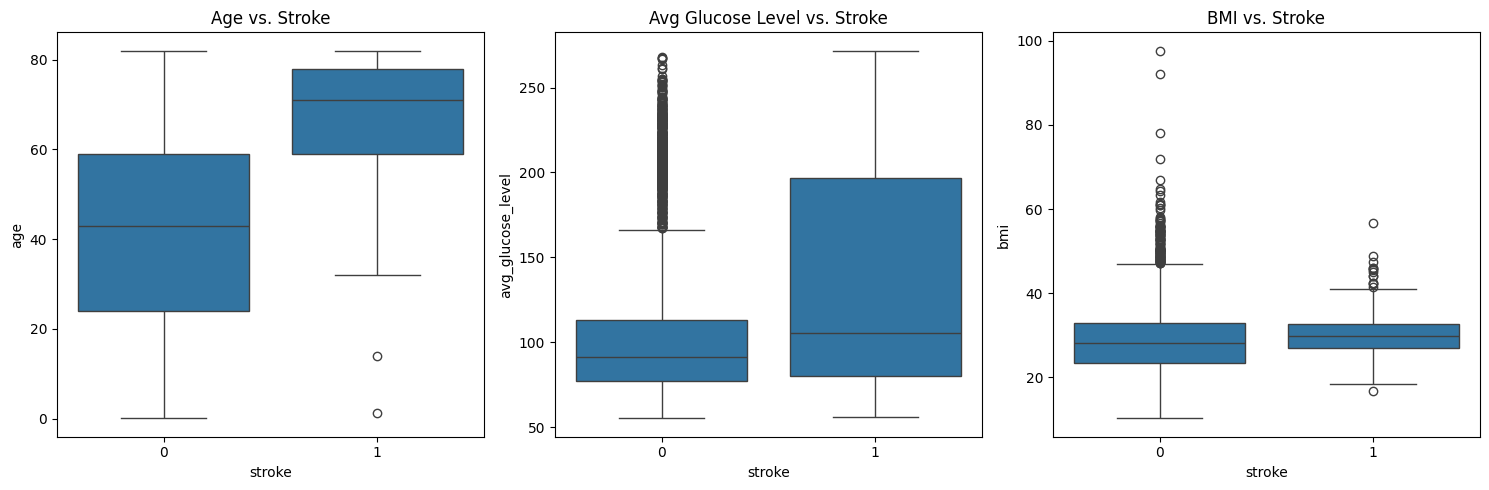

In [43]:
# prompt: CAN YOU PLEASE SHOW HOW AGE , GLUCOSE LEVELS AND bmi AFFETC THE STROKE

# Create a figure and axes
plt.figure(figsize=(15, 5))

# Subplot 1: Age vs. Stroke
plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age vs. Stroke')

# Subplot 2: Avg_glucose_level vs. Stroke
plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Avg Glucose Level vs. Stroke')

# Subplot 3: bmi vs. Stroke
plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI vs. Stroke')

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

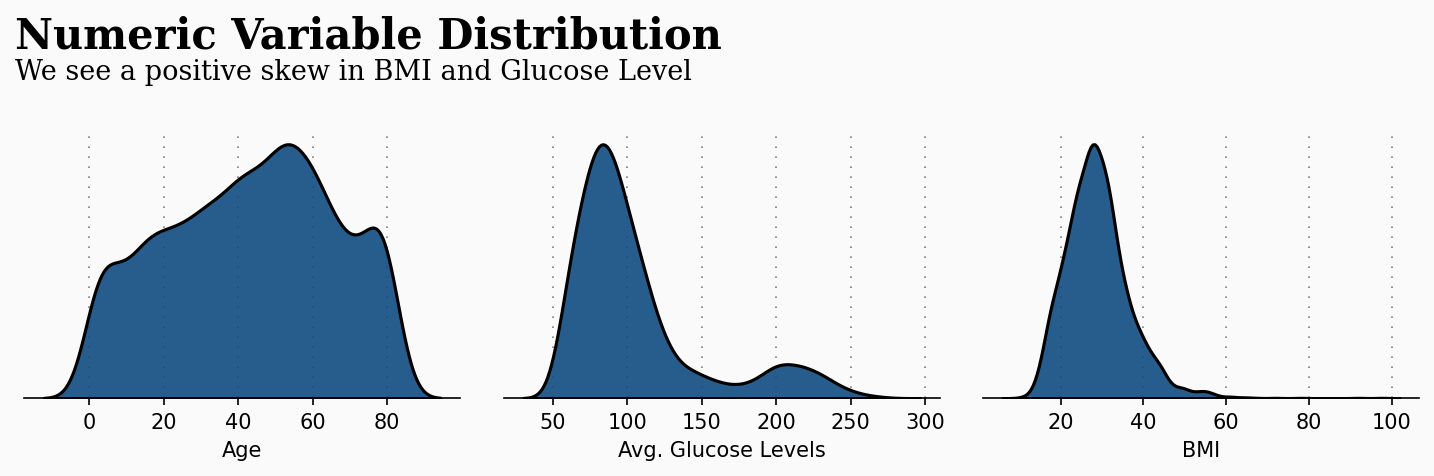

In [45]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()


**Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.**



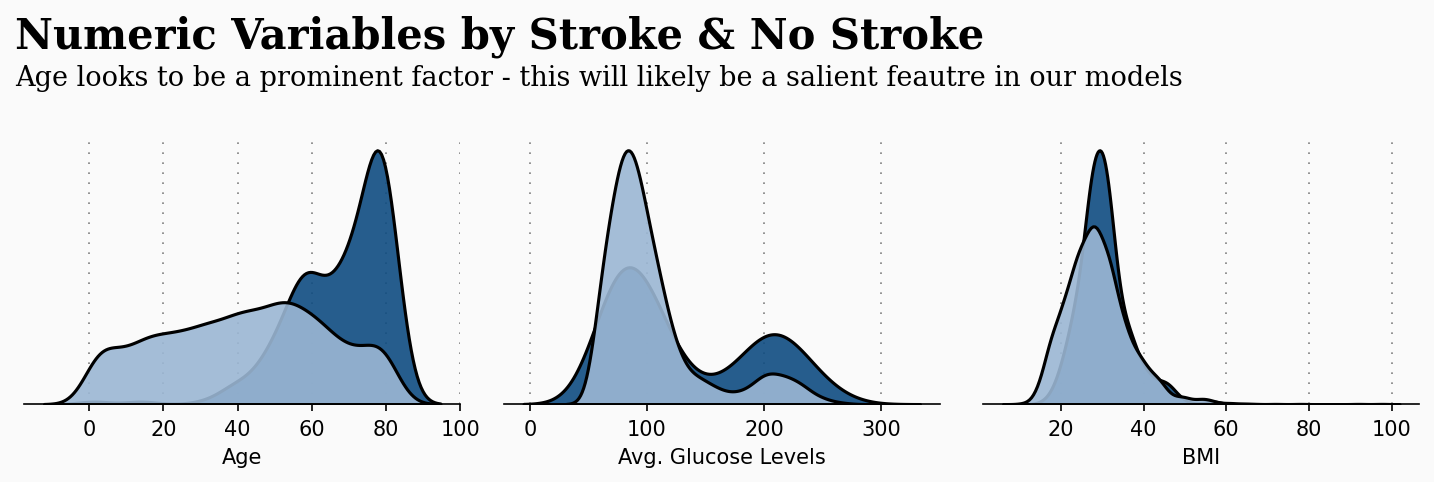

In [46]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)

gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

**Insight**
Based on the above plots, it seems clear that Age is a big factor in stroke patients - the older you get the more at risk you are.

Though less obvious, there are also differences in Avg. Glucose Levels and BMI.

Let's explore those variables further...**

In [59]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

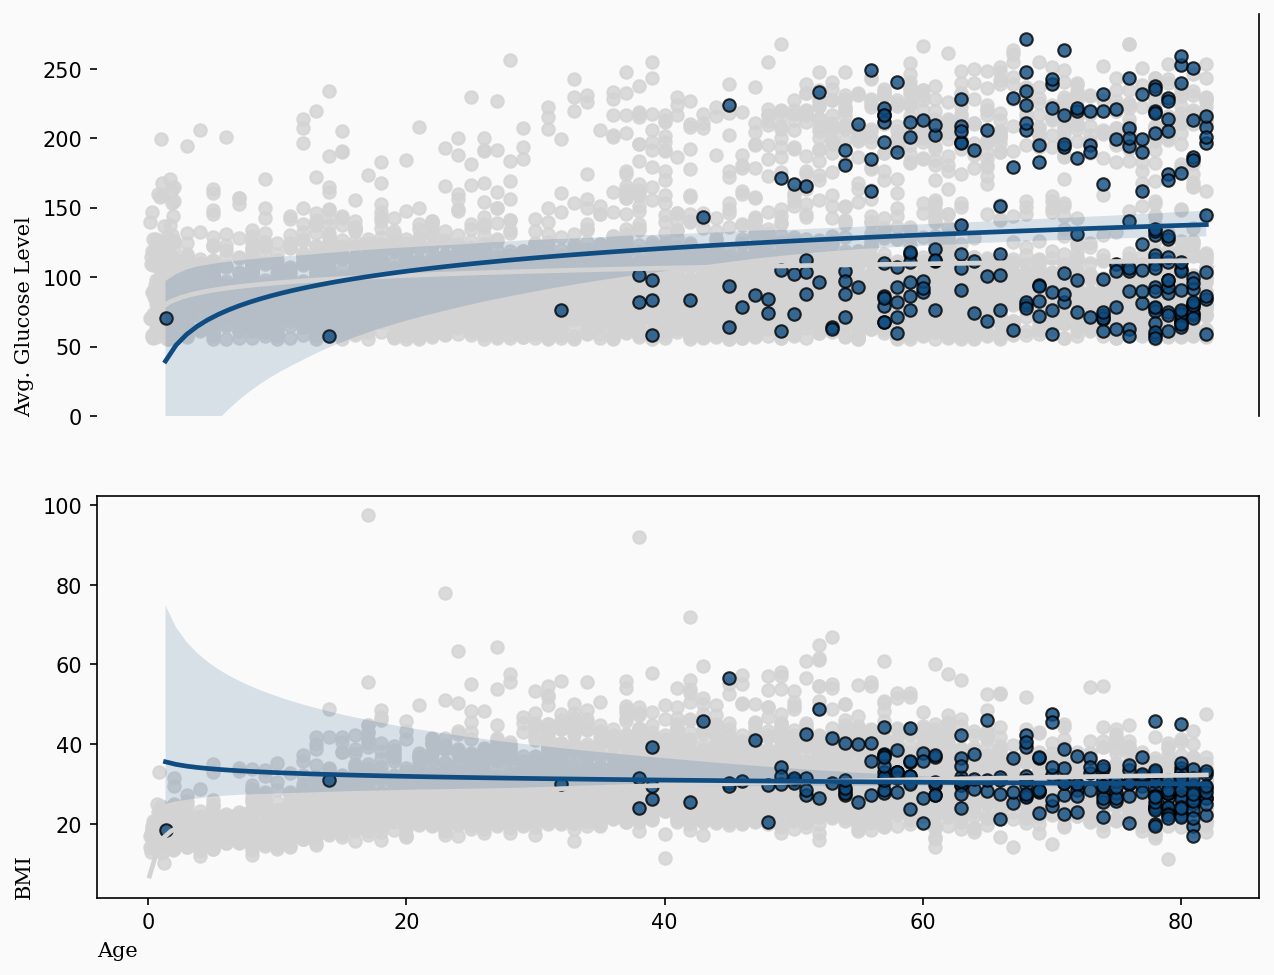

In [61]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,16),dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2])

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# glucose

# Ensure no NaN values in the relevant columns
no_str_only = no_str_only.dropna(subset=['age', 'avg_glucose_level'])

# Ensure age values are strictly positive for logx=True
no_str_only = no_str_only[no_str_only['age'] > 0]

str_only = str_only.dropna(subset=['age', 'avg_glucose_level'])
str_only = str_only[str_only['age'] > 0]

# Check if no_str_only still has data points after filtering
if len(no_str_only['age']) > 1 and len(no_str_only['avg_glucose_level']) > 1:
    sns.regplot(x=no_str_only['age'],y=no_str_only['avg_glucose_level'], # Added x= to explicitly specify the x-axis data
                color='lightgray',
                logx=True,
                ax=ax0)

# Check if str_only still has data points after filtering
if len(str_only['age']) > 1 and len(str_only['avg_glucose_level']) > 1:
    sns.regplot(x=str_only['age'],y=str_only['avg_glucose_level'],  # Added x= to explicitly specify the x-axis data
                color='#0f4c81',
                logx=True,scatter_kws={'edgecolors':['black'],
                                                  'linewidth': 1},
                ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)

# bmi

if len(no_str_only['age']) > 1 and len(no_str_only['bmi']) > 1:
    sns.regplot(x=no_str_only['age'],y=no_str_only['bmi'],  # Added x= to explicitly specify the x-axis data
                color='lightgray',
                logx=True,
                ax=ax1)

if len(str_only['age']) > 1 and len(str_only['bmi']) > 1:
    sns.regplot(x=str_only['age'],y=str_only['bmi'], # Added x= to explicitly specify the x-axis data
                color='#0f4c81', scatter_kws={'edgecolors':['black'],
                                                  'linewidth': 1},
                logx=True,
                ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines

**As we suspected, Age is a big factor, and also has slight relationships with BMI & Avg. Glucose levels.**

**We might understand intuitively that as Age increases, the risk of having a stroke increases too, but can ve visualise this?**

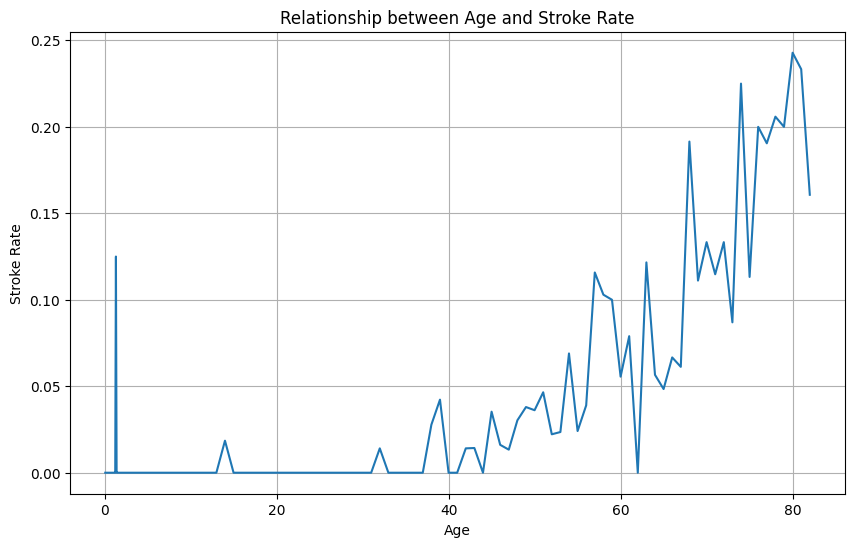

In [63]:
# prompt: please show relation between age and having stroke by linear graph

# Group data by age and calculate the mean stroke rate
age_stroke_rate = df.groupby('age')['stroke'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(age_stroke_rate['age'], age_stroke_rate['stroke'])
plt.xlabel('Age')
plt.ylabel('Stroke Rate')
plt.title('Relationship between Age and Stroke Rate')
plt.grid(True)
plt.show()


another visualization

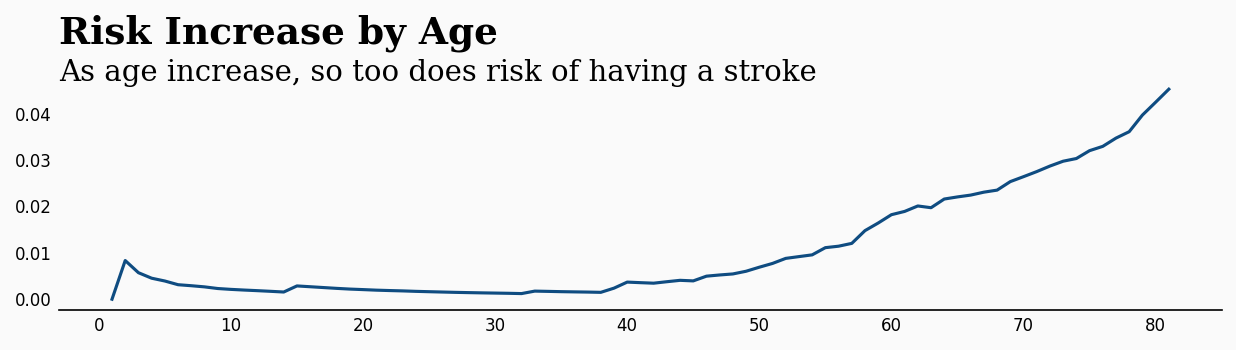

In [64]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

In [68]:
# prompt: how many people had stoke in our dataset?

stroke_count = df['stroke'].sum()
print("Number of people who had a stroke:", stroke_count)


Number of people who had a stroke: 249


**However, you may have notices the low risk values on the y-axis. This is because the dataset is highly imbalanced.

**Only 249 strokes are in our dataset which totals 5000 - around 1 in 20.**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 34.1 MB/s eta 0:00:00


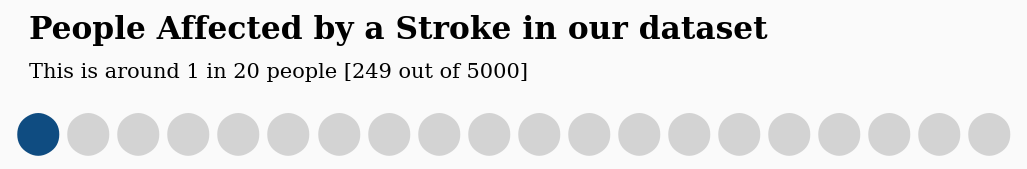

In [70]:
!pip install pywaffle

from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'People Affected by a Stroke in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 1 in 20 people [249 out of 5000]',fontfamily='serif',fontsize=10)

plt.show()

**This needs to be considered when modelling of course, but also when formulating risk.

Strokes are still relatively rare, we are not saying anything is guaranteed, just that risk is increasing.**

In [71]:
# prompt: drop the single 'other' gender

# Drop rows where gender is 'Other'
df = df[df['gender'] != 'Other']


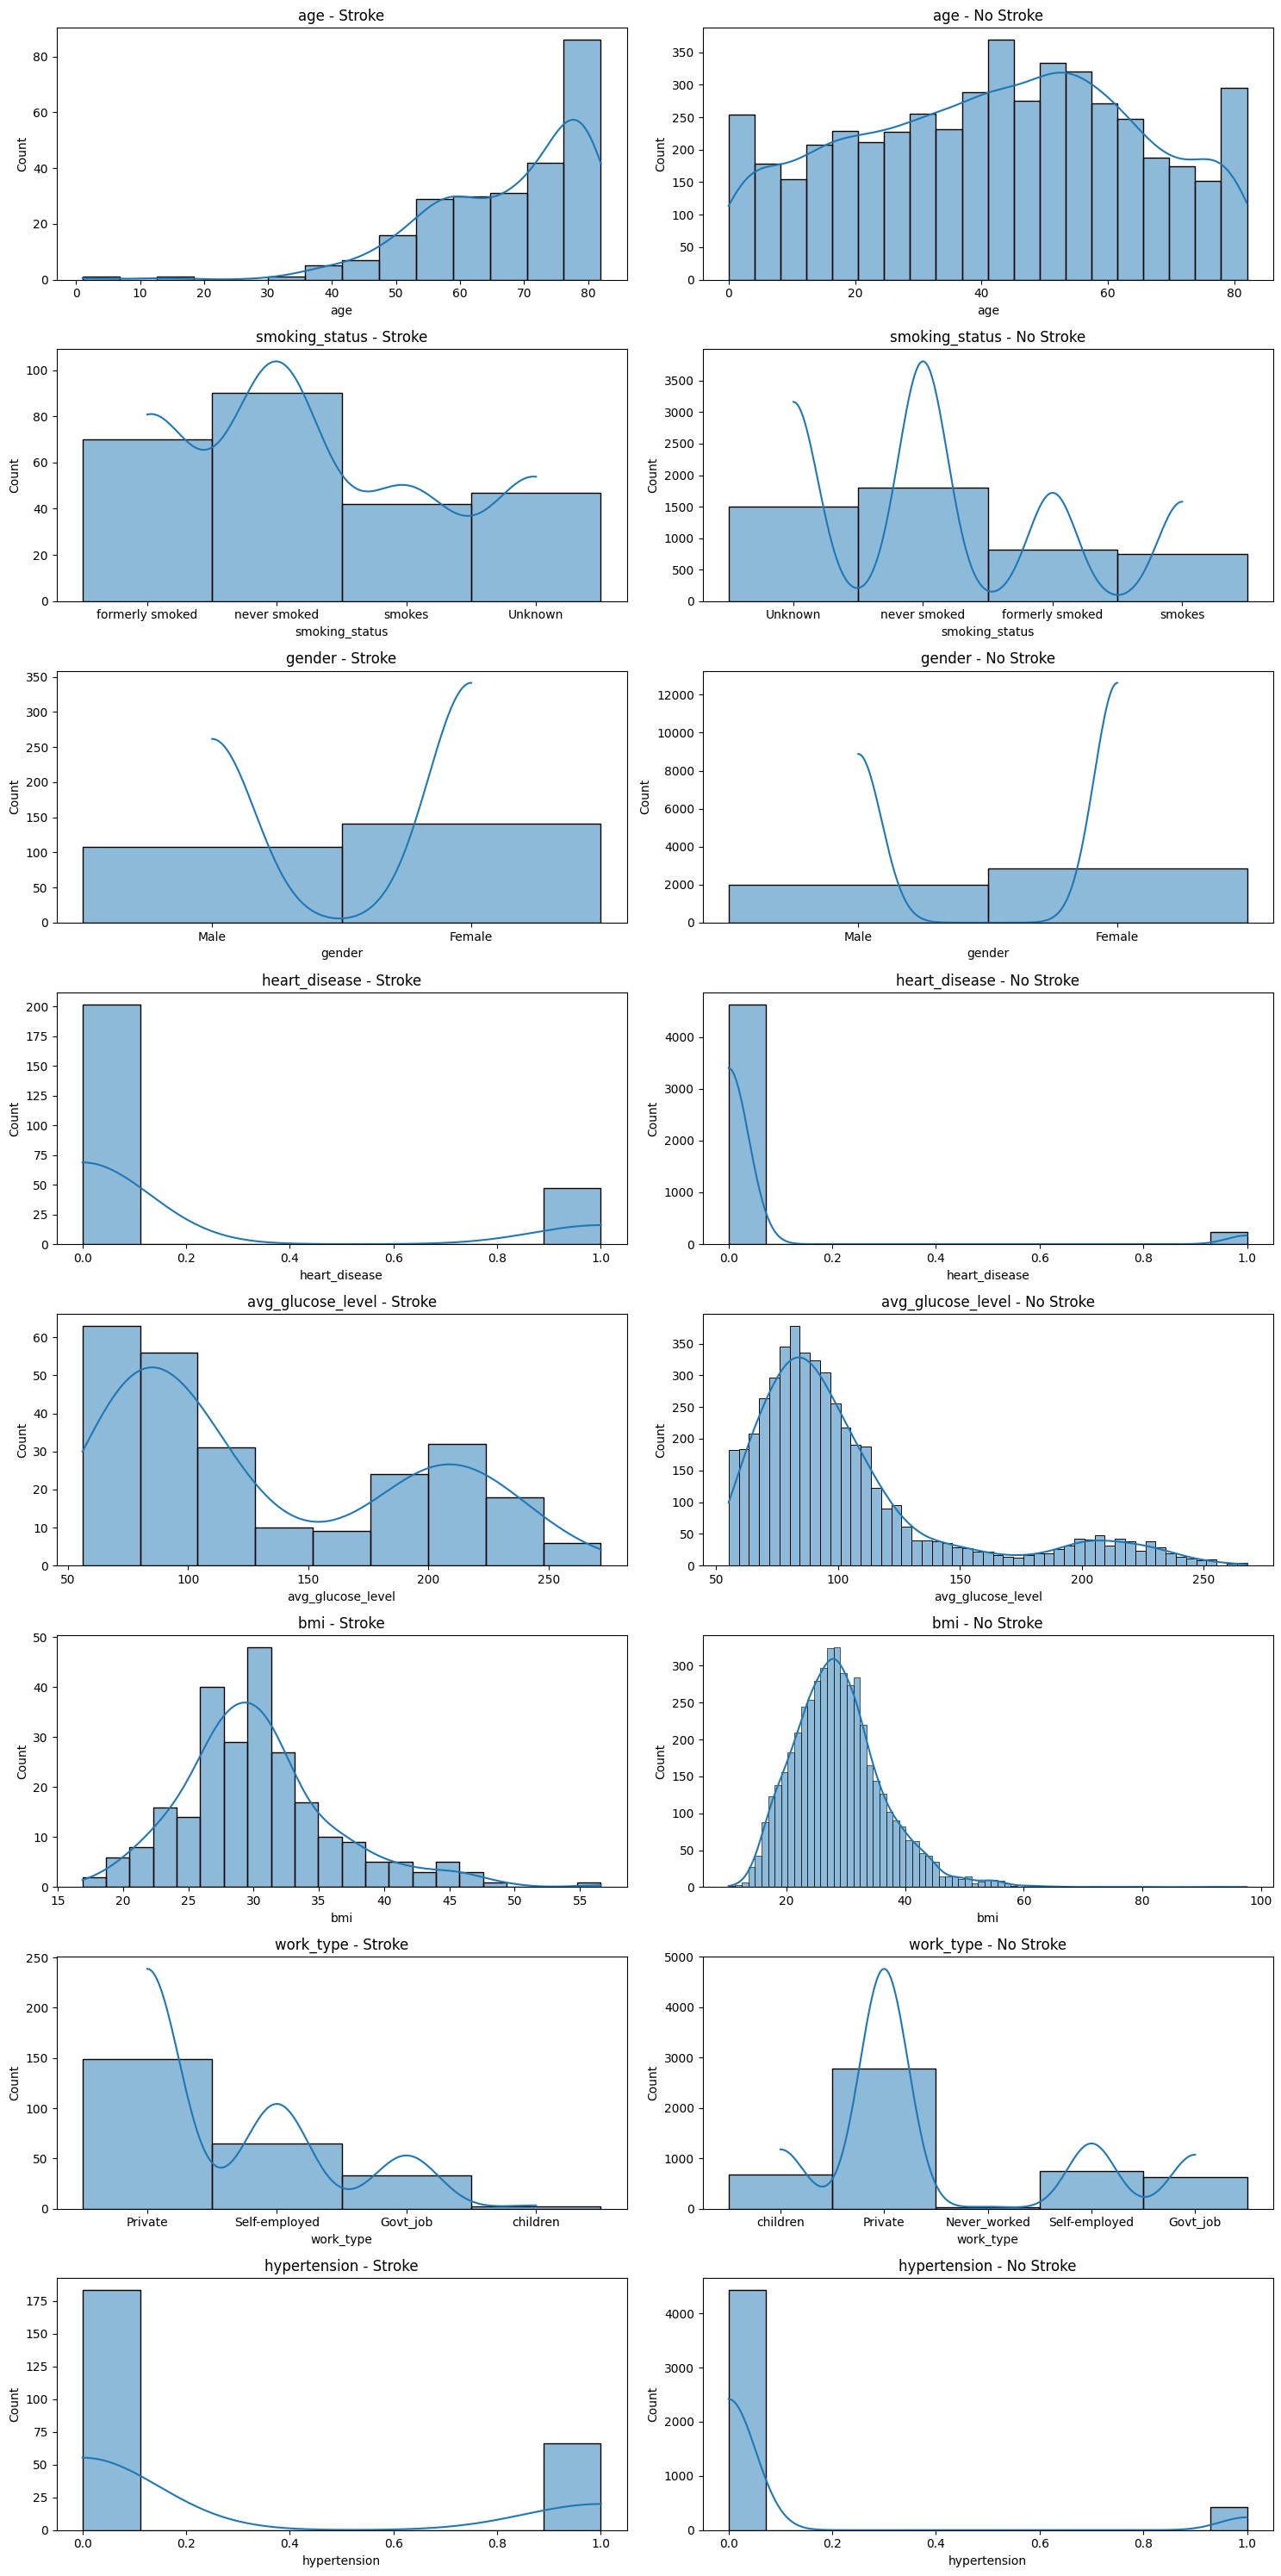

In [72]:
# prompt: now plot several variables in one place, so we can spot interesting trends or features like age, smoking status, gender, heart disease, avg glucose levels, bmi, work type, hypertension and there effects on stoke. Also split the data in to 'Stroke' and 'No-Stroke' so we can see if these two populations differ in any meaningful way.

# Select relevant variables
variables = ['age', 'smoking_status', 'gender', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type', 'hypertension']

# Create subplots for stroke and no-stroke groups
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(15, 30))

# Iterate through variables and create plots
for i, variable in enumerate(variables):
  # Stroke group
  sns.histplot(df[df['stroke'] == 1][variable], ax=axes[i, 0], kde=True)
  axes[i, 0].set_title(f'{variable} - Stroke')

  # No-stroke group
  sns.histplot(df[df['stroke'] == 0][variable], ax=axes[i, 1], kde=True)
  axes[i, 1].set_title(f'{variable} - No Stroke')

# Adjust layout
plt.tight_layout()
plt.show()


**Insights**
The plots above are quite enlightening.

As discussed earlier, we again note the importance of Age, amongst other things.

In [73]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

**Modelling**
Can we predict whether or not an indiviudal will suffer a stroke?
First, I will use the SMOTE (Synthetic Minority Over-sampling Technique) to balance our dataset.

Currently, as I mentioned above, there are many more negative examples of a stroke and this could hinder our model.

This can be addressed using SMOTE.

Baseline
For such an imbalanced dataset, a useful baseline can be to beat the 'Null Accuracy', and in our case, since we're looking for the positive ('stroke'), I will take the inverse of that. In other words, always predicting the most common outcome.

For this case, 249/(249+4861) = 0.048

So a good target to beat would be 5%~ for recall for positive stroke patients.

In [74]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [75]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [76]:
X_test.head(2)


,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31,0,0,1,64.85,23.0
4478,0,40,0,0,1,65.29,28.3


**our data is biased we need to fix it with SMOT**


In [82]:
# prompt: our data is biased we need to fix it with SMOT

!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resh, y_train_resh = smote.fit_resample(X_train, y_train)


**OUR DATA IS NOW EQUAL**

Models
I will model Random Forest, SVM, and Logisitc Regression for this classificatioin task.

In addition, I will utilise 10 fold cross validation.

In [83]:
# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])



#X = upsampled_df.iloc[:,:-1] # X_train_resh
#Y = upsampled_df.iloc[:,-1]# y_train_resh

#retain_x = X.sample(100)
#retain_y = Y.loc[X.index]

#X = X.drop(index=retain_x.index)
#Y = Y.drop(index=retain_x.index)

In [84]:
!pip install scikit-learn

# Import the necessary function
from sklearn.model_selection import cross_val_score

rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [85]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9340087517957976
SVM mean : 0.8754193331502185
Logistic Regression mean : 0.8238134555317848


**Random Forest performed the best**
Often, tree methods will be the model of choice.

In [86]:
# prompt: can you please model Random Forest, SVM, and Logisitc Regression for this classification task.

# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])



#X = upsampled_df.iloc[:,:-1] # X_train_resh
#Y = upsampled_df.iloc[:,-1]# y_train_resh

#retain_x = X.sample(100)
#retain_y = Y.loc[X.index]

#X = X.drop(index=retain_x.index)
#Y = Y.drop(index=retain_x.index)

# Import the necessary function

rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())


Mean f1 scores:
Random Forest mean : 0.9340087517957976
SVM mean : 0.8754193331502185
Logistic Regression mean : 0.8238134555317848


**Now let's try it on the unseen negative data**


In [87]:
rf_pipeline.fit(X_train_resh,y_train_resh)
svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

#X = df.loc[:,X.columns]
#Y = df.loc[:,'stroke']

rf_pred   =rf_pipeline.predict(X_test)
svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [88]:
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)

Mean f1 scores:
RF mean : 0.1596958174904943
SVM mean : 0.15768463073852296
LR mean : 0.1895910780669145


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3404
           1       0.12      0.24      0.16       173

    accuracy                           0.88      3577
   macro avg       0.54      0.58      0.55      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8764327648867767


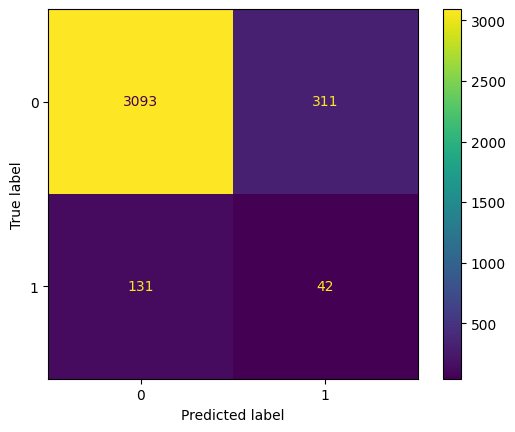

In [90]:
# Import the necessary modules
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Use ConfusionMatrixDisplay to create the confusion matrix visualization.
cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_pipeline.classes_)

# Plot the confusion matrix
cm_display.plot()

print(classification_report(y_test,rf_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_pred))

**I will try using a grid search to find the optimal parameters for our Random Forest**


In [91]:
# Pretty good accuracy, but poor recall!
# Unscaled and not upsampled negative

from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [92]:
rfc = RandomForestClassifier()


In [93]:
#grid = GridSearchCV(rfc,param_grid)

#grid.fit(X_train,y_train)

In [94]:
#grid.best_params_

#{'bootstrap': True, 'max_features': 2, 'n_estimators': 100}

In [95]:
# Let's use those params now

rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X_train_resh,y_train_resh)

rfc_tuned_pred = rfc.predict(X_test)

In [96]:
print(classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print('F1 Score: ',f1_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3404
           1       0.13      0.26      0.17       173

    accuracy                           0.88      3577
   macro avg       0.55      0.59      0.55      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8800670953312832
F1 Score:  0.17341040462427745


**What about Logistic Regression?
Logistic Regression had the highest f1 score above, so perhaps we can tune that for better results.**

In [102]:
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]

log_param_grid = {'penalty': penalty,
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [103]:
#grid.fit(X_train_resh,y_train_resh)


In [104]:
#grid.best_params_

#output:
# {'C': 0.1, 'penalty': 'l2'}

In [105]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.1,penalty='l2',random_state=42))])

logreg_pipeline.fit(X_train_resh,y_train_resh)

#logreg.fit(X_train_resh,y_train_resh)

logreg_tuned_pred   = logreg_pipeline.predict(X_test)

In [106]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      3404
           1       0.11      0.60      0.19       173

    accuracy                           0.76      3577
   macro avg       0.54      0.68      0.52      3577
weighted avg       0.93      0.76      0.82      3577

Accuracy Score:  0.7553816046966731
F1 Score:  0.1920590951061865


**So the hyper-parameter tuning has helped the Logisitc Regression model. It's recall score is much better than Random Forest's - even if the overall acuracy is down.

However, we can maniupulate the threshold that our model uses to classify stroke vs no-stroke.

Let's try that..**

In [108]:
#source code: https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
# modified
from sklearn.preprocessing import binarize

for i in range(1,6):

    cm1=0
    y_pred1 = logreg_pipeline.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(X=y_pred1, threshold=i/10) # Pass y_pred1 as a keyword argument
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'F1 score: ', (f1_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[1418 1986]
 [  11  162]] 

 with 1580 correct predictions,  

 1986 Type I errors( False Positives),  

 11 Type II errors( False Negatives),  

 Accuracy score:  0.44171093094772157 

 F1 score:  0.13959500215424386 

 Sensitivity:  0.9364161849710982 

 Specificity:  0.41656874265569915 



With 0.2 threshold the Confusion Matrix is  

 [[1855 1549]
 [  20  153]] 

 with 2008 correct predictions,  

 1549 Type I errors( False Positives),  

 20 Type II errors( False Negatives),  

 Accuracy score:  0.5613642717360917 

 F1 score:  0.16319999999999998 

 Sensitivity:  0.884393063583815 

 Specificity:  0.5449471210340776 



With 0.3 threshold the Confusion Matrix is  

 [[2144 1260]
 [  33  140]] 

 with 2284 correct predictions,  

 1260 Type I errors( False Positives),  

 33 Type II errors( False Negatives),  

 Accuracy score:  0.6385239027117696 

 F1 score:  0.17800381436745077 

 Sensitivity:  0.8092485549132948 

 Specificity: 

One can see how, by manipulating the threshold, we can catch more strokes.

However, one needs to be careful with this approach. We could just change the threshold such that every patient is predicted to have a stroke so as not to miss any - but this helps no one.

The art is in finding the balance between 'hits' and 'misses'.

F1 score is a decent starting point for this as it is the weighted average of several metrics.

Here's a chart showing what I mean

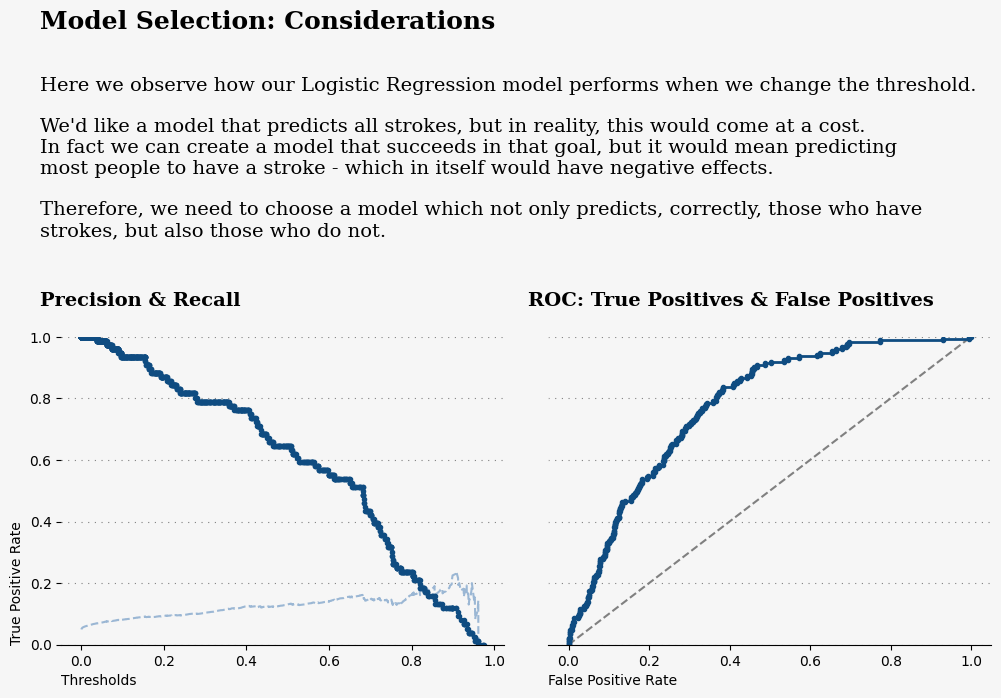

In [109]:
# source code: https://www.kaggle.com/ilyapozdnyakov/rain-in-australia-precision-recall-curves-viz
# heeavily modified plotting

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



# Plots

fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1,2, wspace=0.1,hspace=0)
ax = gs.subplots()

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax[0].set_facecolor(background_color)
ax[1].set_facecolor(background_color)

ax[0].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax[1].grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))



y_scores = logreg_pipeline.predict_proba(X_train)[:,1]


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

ax[0].plot(thresholds, precisions[:-1], 'b--', label='Precision',color='#9bb7d4')
ax[0].plot(thresholds, recalls[:-1], '.', linewidth=1,label='Recall',color='#0f4c81')
ax[0].set_ylabel('True Positive Rate',loc='bottom')
ax[0].set_xlabel('Thresholds',loc='left')
#plt.legend(loc='center left')
ax[0].set_ylim([0,1])


# plot the roc curve for the model
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer',color='gray')
ax[1].plot(lr_fpr, lr_tpr, marker='.', linewidth=2,color='#0f4c81')
ax[1].set_xlabel('False Positive Rate',loc='left')
ax[1].set_ylabel('')
ax[1].set_ylim([0,1])

for s in ["top","right","left"]:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)


ax[0].text(-0.1,2,'Model Selection: Considerations',fontsize=18,fontfamily='serif',fontweight='bold')
ax[0].text(-0.1,1.26,
'''
Here we observe how our Logistic Regression model performs when we change the threshold.

We'd like a model that predicts all strokes, but in reality, this would come at a cost.
In fact we can create a model that succeeds in that goal, but it would mean predicting
most people to have a stroke - which in itself would have negative effects.

Therefore, we need to choose a model which not only predicts, correctly, those who have
strokes, but also those who do not.
''',fontsize=14,fontfamily='serif')


ax[0].text(-0.1,1.1,'Precision & Recall',fontsize=14,fontfamily='serif',fontweight='bold')
ax[1].text(-0.1,1.1,'ROC: True Positives & False Positives',fontsize=14,fontfamily='serif',fontweight='bold')

ax[1].tick_params(axis='y', colors=background_color)

plt.show()

Now we have a decision to make...
The tuned Random Forest gave us a much higher accuracy score of around 94%, but with a recall for Stroke patients of 2%.

The original model had an accuracy of 88%, but a recall for stroke patients of 24%.

This is often where domain knowledge comes in to play.

In my opinion, the model is better off predicting those who will suffer a stroke, rather than predicting who will not.

In [110]:
# Make dataframes to plot

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)],
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)],
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)],
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

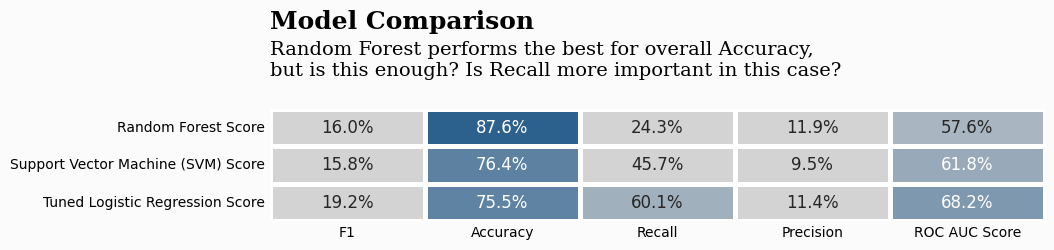

In [111]:
df_models = round(pd.concat([rf_df,svm_df,lr_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

ax0.text(0,-2.15,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.9,'Random Forest performs the best for overall Accuracy,\nbut is this enough? Is Recall more important in this case?',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

**Model by Model Confusion Matrix**
Now we have selected our models, we can view how they performed in each prediction.

A great way to visualise where your data performs well, and where it performs poorly.

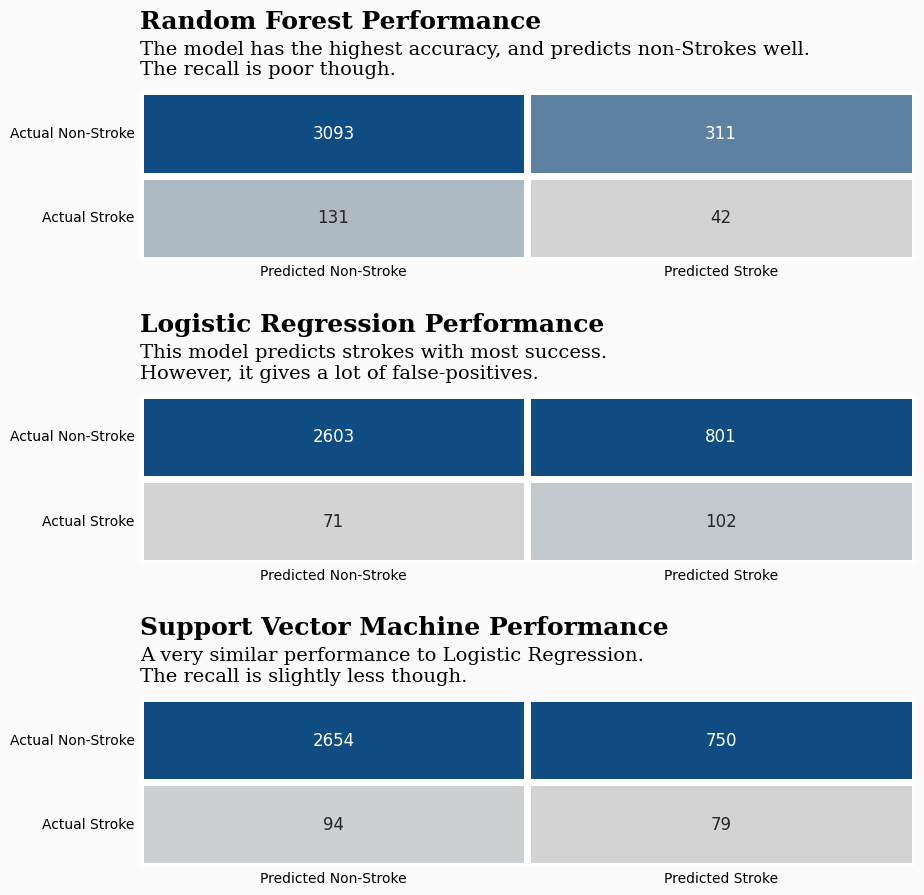

In [112]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})



ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.2,'The model has the highest accuracy, and predicts non-Strokes well.\nThe recall is poor though.',fontsize=14,fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0,-0.2,'This model predicts strokes with most success.\nHowever, it gives a lot of false-positives.',fontsize=14,fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0,-0.2,'A very similar performance to Logistic Regression.\nThe recall is slightly less though.',fontsize=14,fontfamily='serif')


plt.show()

**Model Success ? **
So all of our models have quite a high accuracy, the highest being 95% (Tuned Random Forest).

But the recall of Strokes is quite poor across the board.

Results always need to be considered carefully - ask yourself: 'Why do I need to predict this value?' In our case, I would assume it would be to offer medical advice / preventative treatment to those we predict will have a stroke, therefore, in the real-world, I would probably select the model with the highest recall.

The model's can be considered a success - that is, healthcare professionals would be better equipped with this model than without it.

Seeing as Random Forest did have the highest accuracy, I will delve deeper in to the model and how it works - woth feature importance & LIME.

However, the actual selection of model would be up for debate due to the recall variance.**

** final Selection **
I would opt for Logistic Regression.

It Has a decent accuracy, and the best recall. I feel that on balance it provides the best overall results.

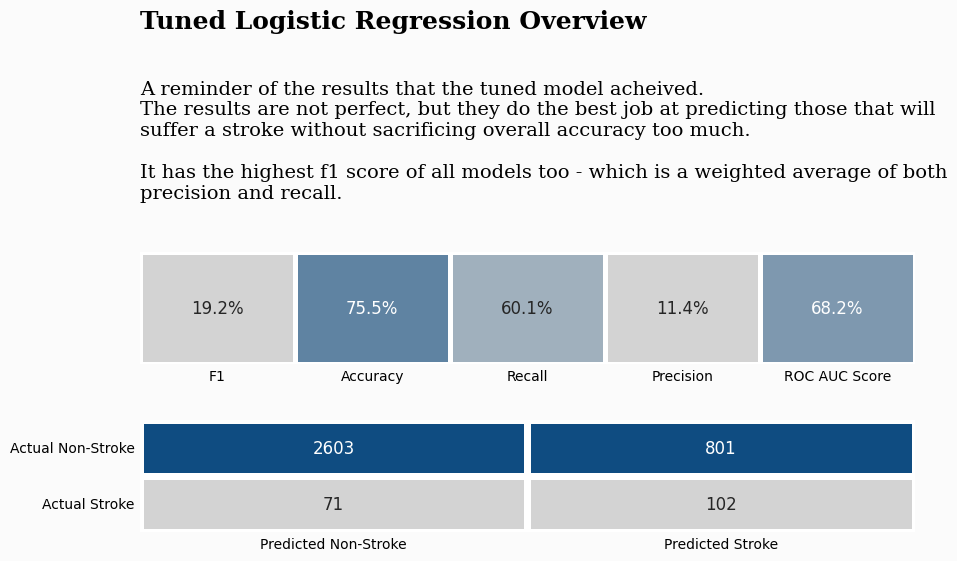

In [113]:
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])

sns.heatmap(lr_df.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95,yticklabels='', linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

ax0.text(0,-2,'Tuned Logistic Regression Overview',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.text(0,-0.3,
'''
A reminder of the results that the tuned model acheived.
The results are not perfect, but they do the best job at predicting those that will
suffer a stroke without sacrificing overall accuracy too much.

It has the highest f1 score of all models too - which is a weighted average of both
precision and recall.
''',fontsize=14,fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)



# Overall

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],vmax=500,vmin=0,xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

** Conclusion **
We started by exploring our data and noticed that certain features, such as Age, looked to be good indicators for predicting a stroke.

After extensive visualization, we went on to try multiple models.

Random Forest, SVM, and Logistic Regression were all tried.

I then tried hyperparameter tuning on all models to see if I could improve their results.

While Random Fornegative had the highest accuracy, the Tuned Logistic Regression model provided the best recall and f1 score.

I therefore selected the Tuned Logistic Regression as my model.